# Install and Import library

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Core Data Structures

## Data Frame

In [ ]:
# Create data from dictionary
data = pd.DataFrame({
    'Hours': [1.0, 2.0, 3.0, 4.5, 5.5, 6.1, 7.4, 8.5, 9.6],
    'Score': [35, 45, 50, 65, 75, 80, 88, 93, 98]
})

## Load Data

In [42]:
df = pd.read_csv("/HoursAndScores_100.csv")
df = df.loc[:, ['Hours', 'Scores']]

## Inspecting the data

In [ ]:
df.head()

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [43]:
df.tail()

,Hours,Scores
95,5.4,22.9
96,5.7,28.1
97,4.8,25.7
98,1.2,7.4
99,2.0,14.1


## Prepare the data

In [44]:
X = df[['Hours']]
y = df['Scores']

# Train Test Split

## Train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression model

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict for new input

In [47]:
predections = model.predict(X_test)

# EDA (Exploratory Data Analysis)

## Visualize the data and regression line

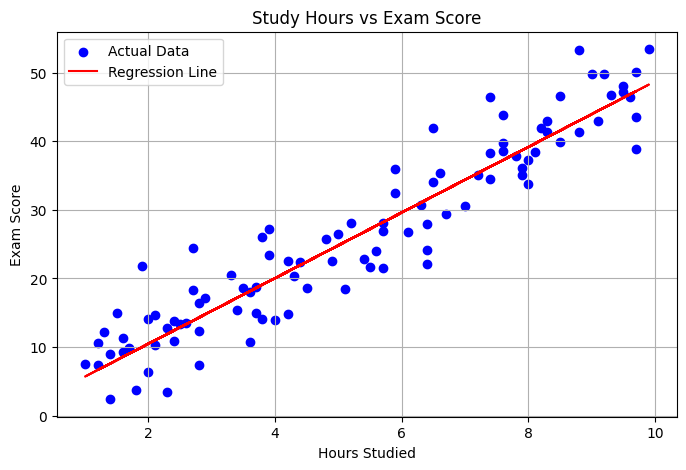

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.grid(True)
plt.legend()
plt.show()

## Histogram

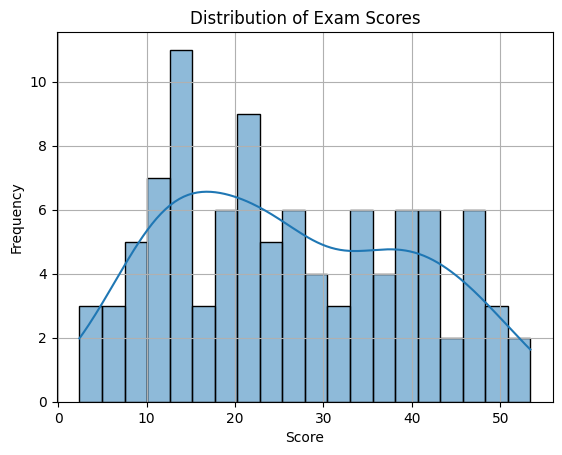

In [59]:
sns.histplot(data=df, x='Scores', bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Model Evaluation

### MSE

In [65]:

mean_squared_error(y_test,predections)

16.310266576219494

### MAE

In [49]:
mean_absolute_error(y_test , predections)

2.9582895076634506

 ## RMSE

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, predections))
rmse

np.float64(4.0385971049634914)

## R2

In [64]:
r2_score(y_test, predections)

0.9120965436008597

# Final

In [51]:
Residuals = y_test - predections
Residuals

,Scores
83,2.726667
53,-1.415894
70,-5.358985
45,-3.879977
44,3.802353
39,1.678039
22,-0.131349
80,10.317809
10,3.938270
0,0.445444


In [52]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [53]:
y_hat = final_model.predict(X)
y_haty_hat = final_model.predict(X)
y_hat

array([22.20640757, 46.88669647, 37.39427766, 31.69882638, 12.71398875,
       12.71398875,  8.44240029, 43.08972895, 31.69882638, 36.44503578,
        7.01853747, 47.36131742, 41.66586613, 15.08709346, 13.66323063,
       14.13785158, 18.88406098, 28.37647979, 24.57951227, 18.40944004,
       32.17344732, 12.23936781, 18.40944004, 21.73178662, 25.52875415,
       39.76738237, 14.61247252, 27.90185885, 31.22420544,  7.96777935,
       32.17344732, 13.18860969,  8.91702123, 46.41207553, 47.36131742,
       40.71662425, 18.88406098, 10.34088405, 35.4957939 , 25.05413321,
       11.29012593, 27.42723791,  7.49315841, 44.98821271, 16.98557722,
       34.54655202, 19.35868192, 28.37647979, 29.32572167, 14.13785158,
       47.36131742, 39.29276143, 46.41207553, 44.51359177, 31.69882638,
       45.46283365,  9.86626311, 14.61247252,  7.96777935, 19.83330286,
       22.68102851, 17.46019816, 41.66586613, 21.25716568, 17.9348191 ,
       29.32572167, 12.23936781, 40.24200331,  9.39164217, 48.31

In [54]:
df['predection'] = y_hat

In [55]:
df['residual'] = df['Scores'] - df['predection']

In [56]:
df

,Hours,Scores,predection,residual
0,4.4,22.4,22.206408,0.193592
1,9.6,46.5,46.886696,-0.386696
2,7.6,38.5,37.394278,1.105722
3,6.4,22.1,31.698826,-9.598826
4,2.4,10.9,12.713989,-1.813989
...,...,...,...,...
95,5.4,22.9,26.952617,-4.052617
96,5.7,28.1,28.376480,-0.276480
97,4.8,25.7,24.104891,1.595109
98,1.2,7.4,7.018537,0.381463
